<a href="https://colab.research.google.com/github/yuliethbernal03/MDigitales/blob/main/Clase9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

plot_1jpg.png

# Linea de tiempo 
2008: Inicio de desarrollo de pandas

2009: pandas se convirtio de libre acceso

2012: Primera edicion para Python 

2015: pandas se convierte en un objeto NumFOCUS con mucho soporte

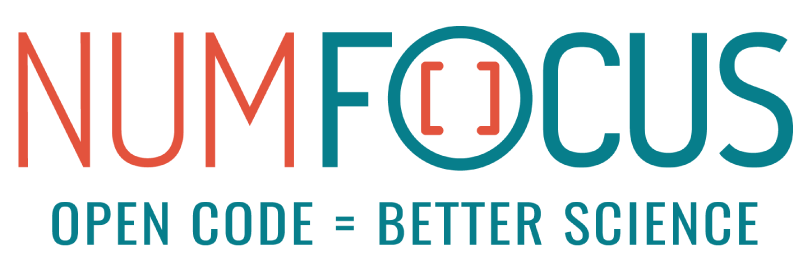


Para poder entender pandas se requiere conocer dos tipos de estructuras:

1. Series
2. DataFrame
3. Panel 


Data structure  | Dimensionalidad | Analogo Excel 
-------------------|-------------------|------------------
Series       | 1D |Columna 
Dataframe       | 2D | Hoja de calculo
Panel       | 3D |Hojas de calculo multiples

Las estructuras mas comunes son **Series** y **DataFrame** 

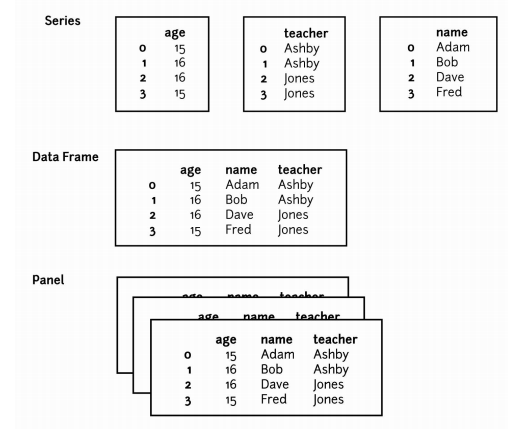




# Series

Se usan para modelar estrcturas 1D similar a las listas en Python aunque tienen mayor numero de bits incluyendo indice y nombre. 

Pueden albergar strings, floats, booleans

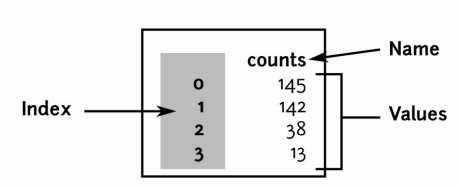

In [ ]:
import pandas as pd


In [ ]:
numerico = pd.Series([145, 142, 38, 13])

In [ ]:
numerico[0]

145

In [ ]:
pd.Series(['a', 'b', 'c'])

0    a
1    b
2    c
dtype: object

In [ ]:
david = pd.Series([145, 142, 38, 13],name='counts')
print(type(david))
david

<class 'pandas.core.series.Series'>


0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [ ]:
print(david.index)

RangeIndex(start=0, stop=4, step=1)


In [ ]:
print(david.values)

[145 142  38  13]


In [ ]:
print(type(david.values))

<class 'numpy.ndarray'>


In [ ]:
# EL indice no necesariamente tiene que se un numero 
david3 = pd.Series([145, 142, 38, 13],name='counts',\
                   index=['Juan', 'Pedro', 'Sofia', 'Andrea'])
print(david3)
print('----')
print(david3.values)
print('----')
print(david3.index)

Juan      145
Pedro     142
Sofia      38
Andrea     13
Name: counts, dtype: int64
----
[145 142  38  13]
----
Index(['Juan', 'Pedro', 'Sofia', 'Andrea'], dtype='object')


In [ ]:
david3[['Andrea', 'Juan']]

Andrea     13
Juan      145
Name: counts, dtype: int64

In [ ]:
# Tambien pueden albergar diferentes objetos 
class J:
   pass
pedro = pd.Series(['David', 'Fran', 13, J()],\
                    name='JJ')
pedro

0                                    David
1                                     Fran
2                                       13
3    <__main__.J object at 0x7fe9a8a03490>
Name: JJ, dtype: object

In [ ]:
# Y que hay de los nulos
nan_ser = pd.Series([2, None],index=['O', 'C'])
print(nan_ser)
'''
Fijarse que aparece float y es porque los NAN solo pueden estar
en este tipo de dato''' 
nan_ser.count()

O    2.0
C    NaN
dtype: float64


1

In [ ]:
pd.Series([1,3,5,7,9,11,13,15])

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
dtype: int64

In [ ]:
pd.Series(range(1,16,2))

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
dtype: int64

El objeto **Series** es mucho mas rapido , consume menos meoria y tiene mas metodos que una lista. 

Tambien tiene muchas similitudes con **Numpy array**

# Proceso CLAB (Creacion, Lectura, Actualizacion, Borrado) 



In [ ]:
g2 = pd.Series({'1969': 7, '1970': [1, 22]}, index=['1969', '1970', '1970'])
g2

1969          7
1970    [1, 22]
1970    [1, 22]
dtype: object

In [ ]:
# 1) Creacion
cidys = pd.Series([10, 7, 1, 22],\
                        index=['1968', '1969', '1970', '1970'],\
                        name='Per')
print(cidys)
print('---')
# Que hay si necesito guardar multiples entradas en mi serie
g2 = pd.Series({'1969': 7, '1970': [1, 22]},index=['1969', '1970', '1970'])
print(g2)

# 2) Lectura
print(cidys['1968'])
# Procesos iterativos
print('--------------------')
for i in cidys:
  print(i)

1968    10
1969     7
1970     1
1970    22
Name: Per, dtype: int64
---
1969          7
1970    [1, 22]
1970    [1, 22]
dtype: object
10
--------------------
10
7
1
22


In [ ]:
cidys['1968']

10

In [ ]:
g2['1970']

1970    [1, 22]
1970    [1, 22]
dtype: object

In [ ]:
impares = pd.Series(range(1,16,2))

In [ ]:
impares

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
dtype: int64

In [ ]:
impares[2:5]

2    5
3    7
4    9
dtype: int64

In [ ]:
impares > 10

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
dtype: bool

In [ ]:
mask = impares > 10

In [ ]:
impares[impares > 10]

5    11
6    13
7    15
dtype: int64

In [ ]:
print(22 in cidys) # Incorrecto
print(22 in set(cidys))
print(22 in cidys.values)
print('1970' in cidys) # Ojo aqui funciona para el index
# Se pueden hacer iteraciones sobre tuplas index, valor
for item in cidys.iteritems():
  print(item)

False
True
True
True
('1968', 10)
('1969', 7)
('1970', 1)
('1970', 22)


In [ ]:
cidys = pd.Series([10, 7, 1, 22],\
                        index=['1968', '1969', '1970', '1970'],\
                        name='Per')
cidys

1968    10
1969     7
1970     1
1970    22
Name: Per, dtype: int64

In [ ]:
cidys['1969'] = 6

In [ ]:
cidys

1968    10
1969     6
1970     1
1970    22
Name: Per, dtype: int64

In [ ]:
# 3) Actualizacion
print(cidys)
cidys['1969'] = 6
print(cidys['1969'])
# Que pasa cuando intento actualizar un indice duplicado 
cidys['1970'] = 2
print('--------')
print(cidys)
cidys = pd.Series([10, 7, 1, 22],\
                        index=['1968', '1969', '1970', '1970'],\
                        name='Per')
# En esos casos es mejor hacer lo siguiente:
cidys.iloc[3] = 2
print(cidys)

1968    10
1969     7
1970     1
1970    22
Name: Per, dtype: int64
6
--------
1968    10
1969     6
1970     2
1970     2
Name: Per, dtype: int64
1968    10
1969     7
1970     1
1970     2
Name: Per, dtype: int64


In [ ]:
l= [1,2]
l.append(3)
l

[1, 2, 3]

In [ ]:
cidys

1968    10
1969     6
1970     1
1970    22
Name: Per, dtype: int64

In [ ]:
# Se pueden agregar valores a la serie:
cidys=cidys.append(pd.Series({'1974':9}))
print(cidys)

1969     6
1970     1
1970    22
1974     9
1974     9
dtype: int64


In [ ]:
cidys

1969     6
1970     1
1970    22
1974     9
1974     9
dtype: int64

In [ ]:
# Borrado 
del cidys['1968']
print(cidys)
# Tambien se pueden hacer filtros 


KeyError: ignored

In [ ]:
cidys

1969     6
1970     1
1970    22
1974     9
1974     9
dtype: int64

In [ ]:
cidys[cidys <= 2]

1970    1
dtype: int64

In [ ]:
cidys

1969     6
1970     1
1970    22
1974     9
1974     9
dtype: int64

In [ ]:
cidys['1970']

1970     1
1970    22
dtype: int64

In [ ]:
cidys.loc['1970']

1970     1
1970    22
dtype: int64

In [ ]:
cidys.iloc[0:3]

1969     6
1970     1
1970    22
dtype: int64

# Indexamiento de series

El atributo .iloc sirve para encontrar la posicion de los indices

Por el contrario .loc permite encontrar los labels en el indice

In [ ]:
print(cidys)
print(cidys.iloc[0])
print('-----')
print(cidys.iloc[-1])
# Proceso de slice
print('-------------')
print(cidys.iloc[0:3]) # 0=:3-1
print(cidys.iloc[[0,2]]) # Devuelve una lista


1969    7
1970    1
1970    2
1974    9
dtype: int64
7
-----
9
-------------
1969    7
1970    1
1970    2
dtype: int64
1969    7
1970    2
dtype: int64


In [ ]:
cidys.loc['1969']

7

Existen otros metodos llamados **.at y .iat** que son los analodos a **.loc y .iloc** solo que devuelven como resultado un objeto **numpy.ndarray**


In [ ]:
cidys.at['1970']

1970    1
1970    2
dtype: int64

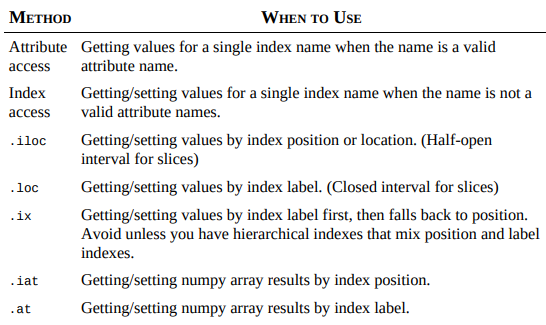

Algunos ejemplos de slice

Slice  | Resultado
-------------------|------------------
0:1       | Primer item 
:1       | Primer item (empieza en 0)
:-2       | Desde el ultimo valor hasta el penultimo
::2       | Toma desde inicio y fin haciendo seleccion cada 2 elementos



In [ ]:
impares

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
dtype: int64

In [ ]:
impares.iloc[2:4]

2    5
3    7
dtype: int64

In [ ]:
impares.loc[2:4]

2    5
3    7
4    9
dtype: int64

In [ ]:
cidys

1969     6
1970     1
1970    22
1974     9
1974     9
dtype: int64

In [ ]:
lista = [1,2,3,4,5,6]
lista

[1, 2, 3, 4, 5, 6]

In [ ]:
lista[2:4]

[3, 4]

In [ ]:
cidys.iloc[2:4]

1970    22
1974     9
dtype: int64

In [ ]:
cidys.loc[['1969','1970']]

1969     6
1970     1
1970    22
dtype: int64

In [ ]:
print(cidys)
print(cidys.iloc[0:2])
print(cidys.iloc[::3])
print(cidys.iloc[:-2])

1969    7
1970    1
1970    2
1974    9
dtype: int64
1969    7
1970    1
dtype: int64
1969    7
1974    9
dtype: int64
1969    7
1970    1
dtype: int64


In [ ]:
# Creacion de masks
mask = cidys > 7
print(mask)

# En general cuando se aplica cualquier operacion a todos los
#elementos de una serie esto se conoce como BROADCASTING
cidys +2 # Otro ejemplo de broadcasting

1969    False
1970    False
1970    False
1974     True
dtype: bool


1969     9
1970     3
1970     4
1974    11
dtype: int64

In [ ]:
# Con los masks se pueden aplicar filtros
cidys[mask]

1974    9
dtype: int64

Se pueden aplicar diversas operaciones logicas

Operacion  | Ejemplo
-------------------|------------------
And       | ser[a & b]
Or       | ser[a | b]
Not       | ser[~a]




In [ ]:
# Porque tenemos resultados diferentes 
print(cidys)
print('-----------')
print(cidys[mask | cidys <= 2])
print('-----------')
print(cidys[mask | (cidys <= 2)])

1969    7
1970    1
1970    2
1974    9
dtype: int64
-----------
1969    7
1970    1
1970    2
1974    9
dtype: int64
-----------
1970    1
1970    2
1974    9
dtype: int64


# Metodos de Series

In [ ]:
import pandas as pd
juan = pd.Series([3, None , 11, 9],\
                     index=['David', 'Pedro', 'Ju', 'Lin'],\
                     name='Counts')

juan2 = pd.Series([5, None , 15, 21],\
                     index=['David', 'Pedro', 'Ju', 'Lin'],\
                     name='Counts')
# Procesos iterativos
for value in juan: 
  print(value)


3.0
nan
11.0
9.0


In [ ]:
juan

David     3.0
Pedro     NaN
Ju       11.0
Lin       9.0
Name: Counts, dtype: float64

In [ ]:
for idx, value in juan.iteritems():
  print('indice: ',idx, '\tValor: ' , value)


indice:  David 	Valor:  3.0
indice:  Pedro 	Valor:  nan
indice:  Ju 	Valor:  11.0
indice:  Lin 	Valor:  9.0


In [ ]:
for idx in juan.keys():
  print(idx)

David
Pedro
Ju
Lin


In [ ]:
print(juan.get('David'))
print(juan.David)

3.0
3.0


In [ ]:
# Uso de counts
jj = pd.Series([67.3, 100, 96.7, None, 100],\
               index=['R', 'P', 'G', 'P', 'B'],\
               name='test2')
print(jj)

R     67.3
P    100.0
G     96.7
P      NaN
B    100.0
Name: test2, dtype: float64


In [ ]:
print(jj.count())
print('----')
print(jj.value_counts())
print('----')
print(jj.unique())
print('----')
print(jj.drop_duplicates())
print('----')
print(jj.duplicated())

4
----
100.0    2
96.7     1
67.3     1
Name: test2, dtype: int64
----
[ 67.3 100.   96.7   nan]
----
R     67.3
P    100.0
G     96.7
P      NaN
Name: test2, dtype: float64
----
R    False
P    False
G    False
P    False
B     True
Name: test2, dtype: bool


In [ ]:
print(jj.groupby(jj.index).first())
print('-----------')
print(jj.groupby(jj.index).last())

B    100.0
G     96.7
P    100.0
R     67.3
Name: test2, dtype: float64
-----------
B    100.0
G     96.7
P    100.0
R     67.3
Name: test2, dtype: float64


In [ ]:
# Funciones estadisticas
print(jj.mean())
print(jj.median())
print(jj.quantile())
print(jj.quantile(0.1))
print(jj.quantile(0.9))
print('------------')
print(jj.describe())
print('-----------')
print(jj.describe(percentiles=[0.05,0.1,0.2]))
print('------------')
print(jj.min())
print('------------')
print(jj.idxmin())
print('------------')
print(jj.max())
print('------------')
print(jj.idxmax())



91.0
98.35
98.35
76.12
100.0
------------
count      4.000000
mean      91.000000
std       15.876398
min       67.300000
25%       89.350000
50%       98.350000
75%      100.000000
max      100.000000
Name: test2, dtype: float64
-----------
count      4.000000
mean      91.000000
std       15.876398
min       67.300000
5%        71.710000
10%       76.120000
20%       84.940000
50%       98.350000
max      100.000000
Name: test2, dtype: float64
------------
67.3
------------
R
------------
100.0
------------
P


In [ ]:
print('------------')
print(jj.var())
print('------------')
print(jj.std())
print('------------')
print(jj.mad())
print('------------')
print(jj.skew())
print('------------')
print(jj.kurt())
print('------------')
print(jj.corr(juan2))
print('------------')
print(jj.cumsum())
print('------------')
print(jj.cumprod())
jj.hist()

------------
252.06000000000006
------------
15.876397576276554
------------
11.850000000000001
------------
-1.9439329105552396
------------
3.7963553468668323
------------
nan
------------
R     67.3
P    167.3
G    264.0
P      NaN
B    364.0
Name: test2, dtype: float64
------------
R          67.3
P        6730.0
G      650791.0
P           NaN
B    65079100.0
Name: test2, dtype: float64


In [ ]:
# Fechas
fechas = pd.to_datetime(pd.Series(['Sep 7, 2001',\
                            '9/8/2001', '9-9-2001', '10th of September 2001',\
                            'Once de Septiembre 2001']), errors='coerce')

In [ ]:
fechas

0   2001-09-07
1   2001-09-08
2   2001-09-09
3   2001-09-10
4          NaT
dtype: datetime64[ns]

In [ ]:
fechas[fechas >= '2001-09-09']

2   2001-09-09
3   2001-09-10
dtype: datetime64[ns]

In [ ]:
cumple = pd.to_datetime(pd.Series(['17-12-1983', '07-11-1954', '30-05-1958'], index=['yo', 'papa', 'mama']))

In [ ]:
cumple


yo     1983-12-17
papa   1954-07-11
mama   1958-05-30
dtype: datetime64[ns]

In [ ]:
# Lidiar con Nas
print(jj.fillna(-1))
print(jj.dropna())
val_mask = jj.notnull()
val_mask
jj[val_mask]

R     67.3
P    100.0
G     96.7
P     -1.0
B    100.0
Name: test2, dtype: float64
R     67.3
P    100.0
G     96.7
B    100.0
Name: test2, dtype: float64


R     67.3
P    100.0
G     96.7
B    100.0
Name: test2, dtype: float64

In [ ]:
# Sorting
orig = jj.copy()
print(orig.sort_values())
print(orig.sort_values(ascending=False))
print(orig.sort_index())
print(orig.sort_index(ascending=False))
#print(orig.rank())

R     67.3
G     96.7
P    100.0
B    100.0
P      NaN
Name: test2, dtype: float64
B    100.0
P    100.0
G     96.7
R     67.3
P      NaN
Name: test2, dtype: float64
B    100.0
G     96.7
P    100.0
P      NaN
R     67.3
Name: test2, dtype: float64
R     67.3
P    100.0
P      NaN
G     96.7
B    100.0
Name: test2, dtype: float64


In [ ]:
# Aplicando funciones
def format(x): 
  if x == 1:
    template = '{} David'
  else:
    template = '{} David'
  return template.format(x)
jj.map(format)

R     67.3 David
P    100.0 David
G     96.7 David
P      nan David
B    100.0 David
Name: test2, dtype: object

In [ ]:
# Operaciones con strings
nombres = pd.Series(['Jorge', 'John', 'Paula'])
print(nombres.str.lower())
print(nombres.str.findall('o'))

0    jorge
1     john
2    paula
dtype: object
0    [o]
1    [o]
2     []
dtype: object


# Dataframes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = np.array([['', "col1", "col2","col3","col4"], 
                 ["row1",11,22,33,44],
                 ["row2",55,66,77,88],
                 ["row3",99,1010,1111,1212],
                 ["row4",1313,1414,1515,1616]])

In [ ]:
# data = all data | index = col 0 | columns = row 0 
df = pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])

In [ ]:
print(df)
print(df.shape) # Forma
df['col1']['row1'] # coordenadas 

      col1  col2  col3  col4
row1    11    22    33    44
row2    55    66    77    88
row3    99  1010  1111  1212
row4  1313  1414  1515  1616
(4, 4)


'11'

In [ ]:
# DataFrame = Matrix
df2 = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]))
print(df2)
print(df2.shape)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
(3, 3)


In [ ]:
# Serie = data group by variables
series = pd.Series({"Argentina": "Buenos Aires", "Chile": "Santiago de Chile", "Colombia": "Bogotá", "Peru":"Lima", "Venezuela":"Caracas", "Mexico":"Mexico D.F."})

In [ ]:
print(series)
print(series.shape)

Argentina         Buenos Aires
Chile        Santiago de Chile
Colombia                Bogotá
Peru                      Lima
Venezuela              Caracas
Mexico             Mexico D.F.
dtype: object
(6,)


In [ ]:
series2 = pd.Series({"Argentina": ["Buenos Aires", "Rosario", "La Plata"], "Chile": "Santiago de Chile", "Colombia": ["Bogotá", "Medellin", "Cali"], "Peru":"Lima", "Venezuela":"Caracas", "Mexico":"Mexico D.F."})

In [ ]:
print(series2)
print(series2.shape)

Argentina    [Buenos Aires, Rosario, La Plata]
Chile                        Santiago de Chile
Colombia              [Bogotá, Medellin, Cali]
Peru                                      Lima
Venezuela                              Caracas
Mexico                             Mexico D.F.
dtype: object
(6,)


In [ ]:
df3 = pd.DataFrame(np.array([[1,2,3,4,5], [6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]))
df3

0   1   2   3   4
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20
4  21  22  23  24  25

In [ ]:
print(len(df3.index)) # index of dataframe
print(len(df3.columns)) # Columns of dataframe

5
5


In [ ]:
# Show statistics of my data
df3.describe()

0          1          2          3          4
count   5.000000   5.000000   5.000000   5.000000   5.000000
mean   11.000000  12.000000  13.000000  14.000000  15.000000
std     7.905694   7.905694   7.905694   7.905694   7.905694
min     1.000000   2.000000   3.000000   4.000000   5.000000
25%     6.000000   7.000000   8.000000   9.000000  10.000000
50%    11.000000  12.000000  13.000000  14.000000  15.000000
75%    16.000000  17.000000  18.000000  19.000000  20.000000
max    21.000000  22.000000  23.000000  24.000000  25.000000

In [ ]:
df4 = pd.DataFrame(np.random.randint(0,50,size=(100,5)))

In [ ]:
df4.describe()

0           1           2           3           4
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    26.470000   23.380000   24.520000   24.980000   25.900000
std     14.302966   14.339167   15.287468   13.842534   15.149424
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%     14.750000   11.000000   11.000000   12.750000   11.000000
50%     28.500000   22.000000   23.000000   25.500000   27.000000
75%     37.250000   38.000000   39.000000   34.250000   39.000000
max     49.000000   49.000000   49.000000   49.000000   49.000000

In [ ]:
df4.corr()

0         1         2         3         4
0  1.000000 -0.022402  0.202549 -0.038573  0.053269
1 -0.022402  1.000000  0.165620  0.035407  0.116796
2  0.202549  0.165620  1.000000 -0.025439 -0.016434
3 -0.038573  0.035407 -0.025439  1.000000 -0.006464
4  0.053269  0.116796 -0.016434 -0.006464  1.000000

In [ ]:
df4.count() # Count of not null elements

0    100
1    100
2    100
3    100
4    100
dtype: int64

In [ ]:
df4.max() # Max Value

0    49
1    49
2    49
3    49
4    49
dtype: int64

In [ ]:
df4.min() # Min value

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
df4.mean() # Mean of all data

0    26.47
1    23.38
2    24.52
3    24.98
4    25.90
dtype: float64

In [ ]:
df4.std() # Standard Deviation

0    14.302966
1    14.339167
2    15.287468
3    13.842534
4    15.149424
dtype: float64

In [ ]:
df4.median() # Middle Value

0    28.5
1    22.0
2    23.0
3    25.5
4    27.0
dtype: float64

In [ ]:
df4[0] # Column

0     36
1     45
2      2
3      0
4     18
      ..
95    29
96     9
97    38
98    10
99    32
Name: 0, Length: 100, dtype: int64

In [ ]:
df4[[0,2,4]] # Two or more Columns

0   2   4
0   36  45  39
1   45  17  46
2    2   2  33
3    0  30   6
4   18   5  35
..  ..  ..  ..
95  29  41  10
96   9   1  45
97  38  20  11
98  10  43  36
99  32  48  37

[100 rows x 3 columns]

In [ ]:
df4.iloc[0][2] # same as M[0,2] Row 0 column 2

45

In [ ]:
df4.loc[0] # Row 0 all columns

0    36
1    25
2    45
3     6
4    39
Name: 0, dtype: int64

In [ ]:
df4.iloc[0,:] # Row 0 all 

0    36
1    25
2    45
3     6
4    39
Name: 0, dtype: int64

In [ ]:
df4.iloc[0,:] = [None,None,None,None,None]

In [ ]:
df4

0     1     2     3     4
0    NaN   NaN   NaN   NaN   NaN
1   45.0  15.0  17.0  18.0  46.0
2    2.0  38.0   2.0  29.0  33.0
3    0.0   0.0  30.0   7.0   6.0
4   18.0  26.0   5.0  36.0  35.0
..   ...   ...   ...   ...   ...
95  29.0  25.0  41.0  11.0  10.0
96   9.0  45.0   1.0  20.0  45.0
97  38.0  43.0  20.0  19.0  11.0
98  10.0  30.0  43.0  34.0  36.0
99  32.0  39.0  48.0  33.0  37.0

[100 rows x 5 columns]

In [ ]:
df4.isnull()

0      1      2      3      4
0    True   True   True   True   True
1   False  False  False  False  False
2   False  False  False  False  False
3   False  False  False  False  False
4   False  False  False  False  False
..    ...    ...    ...    ...    ...
95  False  False  False  False  False
96  False  False  False  False  False
97  False  False  False  False  False
98  False  False  False  False  False
99  False  False  False  False  False

[100 rows x 5 columns]

In [ ]:
df4.isnull().sum()

0    1
1    1
2    1
3    1
4    1
dtype: int64

In [ ]:
# pd.dropna() # remove all nan data

In [ ]:
# df4.dropna(axis=1) # Columns

In [ ]:
df4.fillna('ND')

0   1   2   3   4
0   ND  ND  ND  ND  ND
1   45  15  17  18  46
2    2  38   2  29  33
3    0   0  30   7   6
4   18  26   5  36  35
..  ..  ..  ..  ..  ..
95  29  25  41  11  10
96   9  45   1  20  45
97  38  43  20  19  11
98  10  30  43  34  36
99  32  39  48  33  37

[100 rows x 5 columns]

# DataSets

# Metodo 1 (Github)

In [ ]:
url = 'copied_raw_GH_link'
df1 = pd.read_csv(url)
# Traerlo de Github

FileNotFoundError: ignored

#Metodo 2 (Local)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BankMarketing.csv to BankMarketing.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Dataset banco ejemplo.csv']),sep=",")
df2.head(10)

loan_status  annual_inc  ...        term grade
0   Fully Paid     24000.0  ...   36 months     B
1  Charged Off     30000.0  ...   60 months     C
2   Fully Paid     12252.0  ...   36 months     C
3   Fully Paid     49200.0  ...   36 months     C
4   Fully Paid     80000.0  ...   60 months     B
5   Fully Paid     36000.0  ...   36 months     A
6   Fully Paid     47004.0  ...   60 months     C
7   Fully Paid     48000.0  ...   36 months     E
8  Charged Off     40000.0  ...   60 months     F
9  Charged Off     15000.0  ...   60 months     B

[10 rows x 10 columns]

In [ ]:
df2.shape

(38705, 10)

In [ ]:
df2.tail(10)

loan_status  annual_inc  ...        term grade
38695  Fully Paid    180000.0  ...   36 months     B
38696  Fully Paid     48000.0  ...   36 months     B
38697  Fully Paid     80000.0  ...   36 months     C
38698  Fully Paid     85000.0  ...   36 months     A
38699  Fully Paid     75000.0  ...   36 months     B
38700  Fully Paid    110000.0  ...   36 months     A
38701  Fully Paid     18000.0  ...   36 months     C
38702  Fully Paid    100000.0  ...   36 months     A
38703  Fully Paid    200000.0  ...   36 months     A
38704  Fully Paid     22000.0  ...   36 months     E

[10 rows x 10 columns]

#Metodo 3 (Desde Drive)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
%cd '/content/gdrive/MyDrive/Diplomado Python Análisis y Visualización de Datos/Modulo 2. Manipulación de datos '

/content/gdrive/MyDrive/Diplomado Python Análisis y Visualización de Datos/Modulo 2. Manipulación de datos 


In [ ]:
pk = pd.read_csv('pokemon_data.csv',sep=",")
#pd.read_excel('archivo.xls')
type(pk)

pandas.core.frame.DataFrame

In [ ]:
pk

#                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 12 columns]

In [ ]:
pk.head(20) # show the first elements

#                       Name Type 1  ... Speed  Generation  Legendary
0    1                  Bulbasaur  Grass  ...    45           1      False
1    2                    Ivysaur  Grass  ...    60           1      False
2    3                   Venusaur  Grass  ...    80           1      False
3    3      VenusaurMega Venusaur  Grass  ...    80           1      False
4    4                 Charmander   Fire  ...    65           1      False
5    5                 Charmeleon   Fire  ...    80           1      False
6    6                  Charizard   Fire  ...   100           1      False
7    6  CharizardMega Charizard X   Fire  ...   100           1      False
8    6  CharizardMega Charizard Y   Fire  ...   100           1      False
9    7                   Squirtle  Water  ...    43           1      False
10   8                  Wartortle  Water  ...    58           1      False
11   9                  Blastoise  Water  ...    78           1      False
12   9    BlastoiseMega Blastoise  Water  ...    78           1      False
13  10                   Caterpie    Bug  ...    45           1      False
14  11                    Metapod    Bug  ...    30           1      False
15  12                 Butterfree    Bug  ...    70           1      False
16  13                     Weedle    Bug  ...    50           1      False
17  14                     Kakuna    Bug  ...    35           1      False
18  15                   Beedrill    Bug  ...    75           1      False
19  15      BeedrillMega Beedrill    Bug  ...   145           1      False

[20 rows x 12 columns]

In [ ]:
pk.tail(10) # show the last elements

#                 Name   Type 1  ... Speed  Generation  Legendary
790  714               Noibat   Flying  ...    55           6      False
791  715              Noivern   Flying  ...   123           6      False
792  716              Xerneas    Fairy  ...    99           6       True
793  717              Yveltal     Dark  ...    99           6       True
794  718     Zygarde50% Forme   Dragon  ...    95           6       True
795  719              Diancie     Rock  ...    50           6       True
796  719  DiancieMega Diancie     Rock  ...   110           6       True
797  720  HoopaHoopa Confined  Psychic  ...    70           6       True
798  720   HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721            Volcanion     Fire  ...    70           6       True

[10 rows x 12 columns]

In [ ]:
pk.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

# Excel

In [ ]:
pk_excel = pd.read_excel('pokemon_data.xlsx')
type(pk)

pandas.core.frame.DataFrame

In [ ]:
pk_excel.head(3)

#       Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
0  1  Bulbasaur  Grass  Poison  ...       65     45           1      False
1  2    Ivysaur  Grass  Poison  ...       80     60           1      False
2  3   Venusaur  Grass  Poison  ...      100     80           1      False

[3 rows x 12 columns]

In [ ]:
pk_excel.tail(3)

#                 Name   Type 1  ... Speed  Generation  Legendary
797  720  HoopaHoopa Confined  Psychic  ...    70           6       True
798  720   HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721            Volcanion     Fire  ...    70           6       True

[3 rows x 12 columns]

# TXT

In [ ]:
pk_txt = pd.read_csv('pokemon_data.txt')

In [ ]:
pk_txt.head(3)

#\tName\tType 1\tType 2\tHP\tAttack\tDefense\tSp. Atk\tSp. Def\tSpeed\tGeneration\tLegendary
0  1\tBulbasaur\tGrass\tPoison\t45\t49\t49\t65\t6...                                          
1  2\tIvysaur\tGrass\tPoison\t60\t62\t63\t80\t80\...                                          
2  3\tVenusaur\tGrass\tPoison\t80\t82\t83\t100\t1...

In [ ]:
pk_txt.tail(3)

#\tName\tType 1\tType 2\tHP\tAttack\tDefense\tSp. Atk\tSp. Def\tSpeed\tGeneration\tLegendary
797  720\tHoopaHoopa Confined\tPsychic\tGhost\t80\t...                                          
798  720\tHoopaHoopa Unbound\tPsychic\tDark\t80\t16...                                          
799  721\tVolcanion\tFire\tWater\t80\t110\t120\t130...

In [ ]:
pk_txt = pd.read_csv('pokemon_data.txt', delimiter='\t')

In [ ]:
pk_txt.head(3)

#       Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
0  1  Bulbasaur  Grass  Poison  ...       65     45           1      False
1  2    Ivysaur  Grass  Poison  ...       80     60           1      False
2  3   Venusaur  Grass  Poison  ...      100     80           1      False

[3 rows x 12 columns]

In [ ]:
pk.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
pk['Name'][0:5]

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [ ]:
pk.Name[0:5]  

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3    VenusaurMega Venusaur
4               Charmander
Name: Name, dtype: object

In [ ]:
pk[['Name','HP','Attack']][0:5]

Name  HP  Attack
0              Bulbasaur  45      49
1                Ivysaur  60      62
2               Venusaur  80      82
3  VenusaurMega Venusaur  80     100
4             Charmander  39      52

In [ ]:
pk.iloc[2]

#                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object

In [ ]:
pk.iloc[0:3] # 0: n-1 , 0:3-1 , 0:2

#       Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
0  1  Bulbasaur  Grass  Poison  ...       65     45           1      False
1  2    Ivysaur  Grass  Poison  ...       80     60           1      False
2  3   Venusaur  Grass  Poison  ...      100     80           1      False

[3 rows x 12 columns]

In [ ]:
count = 3
for idx, row in pk.iterrows():
    if count == 0:
        break
    else:
        print(idx, row)
        count -= 1

0 #                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object
1 #                   2
Name          Ivysaur
Type 1          Grass
Type 2         Poison
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object
2 #                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object


In [ ]:
count = 3
for idx, row in pk.iterrows():
    if count == 0:
        break
    else:
        print(idx, row['Name'])
        count -= 1

0 Bulbasaur
1 Ivysaur
2 Venusaur


# Filtrar Data

In [ ]:
pk.loc[pk['Type 1'] == "Fire"][0:10]

#                       Name Type 1  ... Speed  Generation  Legendary
4    4                 Charmander   Fire  ...    65           1      False
5    5                 Charmeleon   Fire  ...    80           1      False
6    6                  Charizard   Fire  ...   100           1      False
7    6  CharizardMega Charizard X   Fire  ...   100           1      False
8    6  CharizardMega Charizard Y   Fire  ...   100           1      False
42  37                     Vulpix   Fire  ...    65           1      False
43  38                  Ninetales   Fire  ...   100           1      False
63  58                  Growlithe   Fire  ...    60           1      False
64  59                   Arcanine   Fire  ...    95           1      False
83  77                     Ponyta   Fire  ...    90           1      False

[10 rows x 12 columns]

In [ ]:
pk.loc[pk['Type 1'] == "Grass"][0:3]

#       Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
0  1  Bulbasaur  Grass  Poison  ...       65     45           1      False
1  2    Ivysaur  Grass  Poison  ...       80     60           1      False
2  3   Venusaur  Grass  Poison  ...      100     80           1      False

[3 rows x 12 columns]

In [ ]:
pok_agua=pk.loc[pk['Type 1'] == "Water"][0:3]
pok_agua.head()

#       Name Type 1 Type 2  ...  Sp. Def  Speed  Generation  Legendary
9   7   Squirtle  Water    NaN  ...       64     43           1      False
10  8  Wartortle  Water    NaN  ...       80     58           1      False
11  9  Blastoise  Water    NaN  ...      105     78           1      False

[3 rows x 12 columns]

In [ ]:
pk.loc[pk['Defense'] >= 100][:3]

#                       Name Type 1  ... Speed  Generation  Legendary
3   3      VenusaurMega Venusaur  Grass  ...    80           1      False
7   6  CharizardMega Charizard X   Fire  ...   100           1      False
11  9                  Blastoise  Water  ...    78           1      False

[3 rows x 12 columns]

In [ ]:
pk.describe()

#          HP      Attack  ...     Sp. Def       Speed  Generation
count  800.000000  800.000000  800.000000  ...  800.000000  800.000000   800.00000
mean   362.813750   69.258750   79.001250  ...   71.902500   68.277500     3.32375
std    208.343798   25.534669   32.457366  ...   27.828916   29.060474     1.66129
min      1.000000    1.000000    5.000000  ...   20.000000    5.000000     1.00000
25%    184.750000   50.000000   55.000000  ...   50.000000   45.000000     2.00000
50%    364.500000   65.000000   75.000000  ...   70.000000   65.000000     3.00000
75%    539.250000   80.000000  100.000000  ...   90.000000   90.000000     5.00000
max    721.000000  255.000000  190.000000  ...  230.000000  180.000000     6.00000

[8 rows x 8 columns]

In [ ]:
pk.sort_values('HP', ascending=True)[:10]

#       Name    Type 1 Type 2  ...  Sp. Def  Speed  Generation  Legendary
316  292   Shedinja       Bug  Ghost  ...       30     40           3      False
55    50    Diglett    Ground    NaN  ...       45     95           1      False
139  129   Magikarp     Water    NaN  ...       20     80           1      False
388  355    Duskull     Ghost    NaN  ...       90     25           3      False
487  439   Mime Jr.   Psychic  Fairy  ...       90     60           4      False
381  349     Feebas     Water    NaN  ...       55     80           3      False
186  172      Pichu  Electric    NaN  ...       35     60           2      False
230  213    Shuckle       Bug   Rock  ...      230      5           2      False
68    63       Abra   Psychic    NaN  ...       55     90           1      False
88    81  Magnemite  Electric  Steel  ...       55     45           1      False

[10 rows x 12 columns]

In [ ]:
pk.sort_values(['Type 1','HP'], ascending=True)[:10]

#        Name Type 1  Type 2  ...  Sp. Def  Speed  Generation  Legendary
316  292    Shedinja    Bug   Ghost  ...       30     40           3      False
230  213     Shuckle    Bug    Rock  ...      230      5           2      False
462  415      Combee    Bug  Flying  ...       42     70           4      False
603  543    Venipede    Bug  Poison  ...       39     57           5      False
314  290     Nincada    Bug  Ground  ...       30     40           3      False
51    46       Paras    Bug   Grass  ...       55     25           1      False
446  401   Kricketot    Bug     NaN  ...       41     25           4      False
732  664  Scatterbug    Bug     NaN  ...       25     35           6      False
16    13      Weedle    Bug  Poison  ...       20     50           1      False
179  165      Ledyba    Bug  Flying  ...       80     55           2      False

[10 rows x 12 columns]

# Hacer cambios

In [ ]:
pk['Total'] = pk['HP'] + pk['Attack'] + pk['Defense'] + pk['Sp. Atk'] + pk['Sp. Def'] + pk['Speed']

In [ ]:
pk.head(10)

#                       Name Type 1  ... Generation  Legendary  Total
0  1                  Bulbasaur  Grass  ...          1      False    318
1  2                    Ivysaur  Grass  ...          1      False    405
2  3                   Venusaur  Grass  ...          1      False    525
3  3      VenusaurMega Venusaur  Grass  ...          1      False    625
4  4                 Charmander   Fire  ...          1      False    309
5  5                 Charmeleon   Fire  ...          1      False    405
6  6                  Charizard   Fire  ...          1      False    534
7  6  CharizardMega Charizard X   Fire  ...          1      False    634
8  6  CharizardMega Charizard Y   Fire  ...          1      False    634
9  7                   Squirtle  Water  ...          1      False    314

[10 rows x 13 columns]

In [ ]:
pk.drop(columns=['Total'])

#                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 12 columns]

In [ ]:
pk['Total'] = pk.iloc[:, 4:10].sum(axis=1)

In [ ]:
pk.head(3)

#       Name Type 1  Type 2  ...  Speed  Generation  Legendary  Total
0  1  Bulbasaur  Grass  Poison  ...     45           1      False    318
1  2    Ivysaur  Grass  Poison  ...     60           1      False    405
2  3   Venusaur  Grass  Poison  ...     80           1      False    525

[3 rows x 13 columns]

In [ ]:
pk2 = pk[['Total','Name', 'HP', 'Defense']] 

In [ ]:
pk2.head(3)

Total       Name  HP  Defense
0    318  Bulbasaur  45       49
1    405    Ivysaur  60       63
2    525   Venusaur  80       83

In [ ]:
grass = pk.loc[pk['Type 1'] == "Grass"].loc[pk['HP'] > 90]

In [ ]:
grass

#               Name Type 1  ... Generation  Legendary  Total
111  103          Exeggutor  Grass  ...          1      False    520
390  357            Tropius  Grass  ...          3      False    460
434  389           Torterra  Grass  ...          4      False    525
516  465          Tangrowth  Grass  ...          4      False    535
550  492  ShayminLand Forme  Grass  ...          4       True    600
551  492   ShayminSky Forme  Grass  ...          4       True    600
652  591          Amoonguss  Grass  ...          5      False    464
701  640           Virizion  Grass  ...          5       True    580
741  673             Gogoat  Grass  ...          6      False    531

[9 rows x 13 columns]

In [ ]:
grass = pk.loc[(pk['Type 1'] == "Grass") & (pk['HP'] > 90)] # | (or) & (and)
grass

#               Name Type 1  ... Generation  Legendary  Total
111  103          Exeggutor  Grass  ...          1      False    520
390  357            Tropius  Grass  ...          3      False    460
434  389           Torterra  Grass  ...          4      False    525
516  465          Tangrowth  Grass  ...          4      False    535
550  492  ShayminLand Forme  Grass  ...          4       True    600
551  492   ShayminSky Forme  Grass  ...          4       True    600
652  591          Amoonguss  Grass  ...          5      False    464
701  640           Virizion  Grass  ...          5       True    580
741  673             Gogoat  Grass  ...          6      False    531

[9 rows x 13 columns]

In [ ]:
cols = pk.columns.values
cols

array(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Total'],
      dtype=object)

In [ ]:
cols2 = list(pk.columns.values)
cols2

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Total']

In [ ]:
pk3 = pk[cols2[0:4] + [cols2[-1]] + cols2[4:12]]
pk3

#                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]

# Exportar Data

In [ ]:
grass = pk.loc[pk['Type 1'] == 'Grass']
grass.to_csv('grass_type_29Junio.csv', index=False)
# grass.to_excel('grass_type.xlsx', index=False)
# grass.to_csv('grass_type.txt', index=False, sep='\t')
grass[:3]

#       Name Type 1  Type 2  ...  Speed  Generation  Legendary  Total
0  1  Bulbasaur  Grass  Poison  ...     45           1      False    318
1  2    Ivysaur  Grass  Poison  ...     60           1      False    405
2  3   Venusaur  Grass  Poison  ...     80           1      False    525

[3 rows x 13 columns]

In [ ]:
water = pk.loc[pk['Type 1'] == 'Water']
#water.to_csv('water_type.csv', index=False)
water[:3]

#       Name Type 1 Type 2  ...  Speed  Generation  Legendary  Total
9   7   Squirtle  Water    NaN  ...     43           1      False    314
10  8  Wartortle  Water    NaN  ...     58           1      False    405
11  9  Blastoise  Water    NaN  ...     78           1      False    530

[3 rows x 13 columns]

In [ ]:
fire = pk.loc[pk['Type 1'] == 'Fire']
fire.to_csv('fire_type.csv', index=False)
fire[:3]

#        Name Type 1  Type 2  ...  Speed  Generation  Legendary  Total
4  4  Charmander   Fire     NaN  ...     65           1      False    309
5  5  Charmeleon   Fire     NaN  ...     80           1      False    405
6  6   Charizard   Fire  Flying  ...    100           1      False    534

[3 rows x 13 columns]

In [ ]:
water = water.reset_index()
water[:15]

index   #                     Name  ... Generation Legendary  Total
0       9   7                 Squirtle  ...          1     False    314
1      10   8                Wartortle  ...          1     False    405
2      11   9                Blastoise  ...          1     False    530
3      12   9  BlastoiseMega Blastoise  ...          1     False    630
4      59  54                  Psyduck  ...          1     False    320
5      60  55                  Golduck  ...          1     False    500
6      65  60                  Poliwag  ...          1     False    300
7      66  61                Poliwhirl  ...          1     False    385
8      67  62                Poliwrath  ...          1     False    510
9      78  72                Tentacool  ...          1     False    335
10     79  73               Tentacruel  ...          1     False    515
11     85  79                 Slowpoke  ...          1     False    315
12     86  80                  Slowbro  ...          1     False    490
13     87  80      SlowbroMega Slowbro  ...          1     False    590
14     93  86                     Seel  ...          1     False    325

[15 rows x 14 columns]

In [ ]:
fire = fire.reset_index(drop=True)
fire[:15]

#                       Name Type 1  ... Generation  Legendary  Total
0     4                 Charmander   Fire  ...          1      False    309
1     5                 Charmeleon   Fire  ...          1      False    405
2     6                  Charizard   Fire  ...          1      False    534
3     6  CharizardMega Charizard X   Fire  ...          1      False    634
4     6  CharizardMega Charizard Y   Fire  ...          1      False    634
5    37                     Vulpix   Fire  ...          1      False    299
6    38                  Ninetales   Fire  ...          1      False    505
7    58                  Growlithe   Fire  ...          1      False    350
8    59                   Arcanine   Fire  ...          1      False    555
9    77                     Ponyta   Fire  ...          1      False    410
10   78                   Rapidash   Fire  ...          1      False    500
11  126                     Magmar   Fire  ...          1      False    495
12  136                    Flareon   Fire  ...          1      False    525
13  146                    Moltres   Fire  ...          1       True    580
14  155                  Cyndaquil   Fire  ...          2      False    309

[15 rows x 13 columns]

In [ ]:
megas = pk.loc[pk['Name'].str.contains('Mega')]
megas[:5]

#                       Name Type 1  ... Generation  Legendary  Total
3    3      VenusaurMega Venusaur  Grass  ...          1      False    625
7    6  CharizardMega Charizard X   Fire  ...          1      False    634
8    6  CharizardMega Charizard Y   Fire  ...          1      False    634
12   9    BlastoiseMega Blastoise  Water  ...          1      False    630
19  15      BeedrillMega Beedrill    Bug  ...          1      False    495

[5 rows x 13 columns]

In [ ]:
no_megas = pk.loc[~pk['Name'].str.contains('Mega')]
no_megas[:5]

#        Name Type 1  Type 2  ...  Speed  Generation  Legendary  Total
0  1   Bulbasaur  Grass  Poison  ...     45           1      False    318
1  2     Ivysaur  Grass  Poison  ...     60           1      False    405
2  3    Venusaur  Grass  Poison  ...     80           1      False    525
4  4  Charmander   Fire     NaN  ...     65           1      False    309
5  5  Charmeleon   Fire     NaN  ...     80           1      False    405

[5 rows x 13 columns]

In [ ]:
# Import Regular Exp
import re

fire_water = pk.loc[pk['Type 1'].str.contains('Fire|Water', regex=True)]
fire_water[:10]

#                       Name Type 1  ... Generation  Legendary  Total
4    4                 Charmander   Fire  ...          1      False    309
5    5                 Charmeleon   Fire  ...          1      False    405
6    6                  Charizard   Fire  ...          1      False    534
7    6  CharizardMega Charizard X   Fire  ...          1      False    634
8    6  CharizardMega Charizard Y   Fire  ...          1      False    634
9    7                   Squirtle  Water  ...          1      False    314
10   8                  Wartortle  Water  ...          1      False    405
11   9                  Blastoise  Water  ...          1      False    530
12   9    BlastoiseMega Blastoise  Water  ...          1      False    630
42  37                     Vulpix   Fire  ...          1      False    299

[10 rows x 13 columns]

In [ ]:
grass_water = pk.loc[pk['Type 1'].str.contains('grass|water', flags=re.I, regex=True)]
grass_water[:10]

#                     Name Type 1  ... Generation  Legendary  Total
0    1                Bulbasaur  Grass  ...          1      False    318
1    2                  Ivysaur  Grass  ...          1      False    405
2    3                 Venusaur  Grass  ...          1      False    525
3    3    VenusaurMega Venusaur  Grass  ...          1      False    625
9    7                 Squirtle  Water  ...          1      False    314
10   8                Wartortle  Water  ...          1      False    405
11   9                Blastoise  Water  ...          1      False    530
12   9  BlastoiseMega Blastoise  Water  ...          1      False    630
48  43                   Oddish  Grass  ...          1      False    320
49  44                    Gloom  Grass  ...          1      False    395

[10 rows x 13 columns]

In [ ]:
ad_pk = pk.loc[pk['Name'].str.contains('fr[a-z]*', flags=re.I, regex=True)]
ad_pk[:10]

#              Name    Type 1  ... Generation  Legendary  Total
15    12        Butterfree       Bug  ...          1      False    395
530  478          Froslass       Ice  ...          4      False    480
534  479  RotomFrost Rotom  Electric  ...          4      False    520
653  592          Frillish     Water  ...          5      False    335
672  611           Fraxure    Dragon  ...          5      False    410
724  656           Froakie     Water  ...          6      False    314
725  657         Frogadier     Water  ...          6      False    405
744  676           Furfrou    Normal  ...          6      False    472

[8 rows x 13 columns]

In [ ]:
pi_pk = pk.loc[pk['Name'].str.contains('u$', flags=re.I, regex=True)]
pi_pk[:10]

#       Name    Type 1    Type 2  ...  Speed  Generation  Legendary  Total
30    25    Pikachu  Electric       NaN  ...     90           1      False    320
31    26     Raichu  Electric       NaN  ...    110           1      False    485
129  120     Staryu     Water       NaN  ...     85           1      False    340
184  170   Chinchou     Water  Electric  ...     67           2      False    330
186  172      Pichu  Electric       NaN  ...     60           2      False    205
191  177       Natu   Psychic    Flying  ...     70           2      False    320
192  178       Xatu   Psychic    Flying  ...     95           2      False    470
262  243     Raikou  Electric       NaN  ...    115           2       True    580
364  333     Swablu    Normal    Flying  ...     50           3      False    310
464  417  Pachirisu  Electric       NaN  ...     95           4      False    405

[10 rows x 13 columns]

In [ ]:
pk2 = pk

In [ ]:
pk2.loc[pk2['Type 1'] == 'Fire', 'Legendary'] = True
# pk2.loc[(pk2['Type 1'] == 'Fire') & (pk2['HP'] > 100), ['Legendary', 'Total']] = True
pk2[:15]

#                       Name Type 1  ... Generation  Legendary  Total
0    1                  Bulbasaur  Grass  ...          1      False    318
1    2                    Ivysaur  Grass  ...          1      False    405
2    3                   Venusaur  Grass  ...          1      False    525
3    3      VenusaurMega Venusaur  Grass  ...          1      False    625
4    4                 Charmander   Fire  ...          1       True    309
5    5                 Charmeleon   Fire  ...          1       True    405
6    6                  Charizard   Fire  ...          1       True    534
7    6  CharizardMega Charizard X   Fire  ...          1       True    634
8    6  CharizardMega Charizard Y   Fire  ...          1       True    634
9    7                   Squirtle  Water  ...          1      False    314
10   8                  Wartortle  Water  ...          1      False    405
11   9                  Blastoise  Water  ...          1      False    530
12   9    BlastoiseMega Blastoise  Water  ...          1      False    630
13  10                   Caterpie    Bug  ...          1      False    195
14  11                    Metapod    Bug  ...          1      False    205

[15 rows x 13 columns]

In [ ]:
pk.groupby(['Type 1']).mean()

#         HP      Attack  ...  Generation  Legendary       Total
Type 1                                       ...                                   
Bug       334.492754  56.884058   70.971014  ...    3.217391   0.000000  378.927536
Dark      461.354839  66.806452   88.387097  ...    4.032258   0.064516  445.741935
Dragon    474.375000  83.312500  112.125000  ...    3.875000   0.375000  550.531250
Electric  363.500000  59.795455   69.090909  ...    3.272727   0.090909  443.409091
Fairy     449.529412  74.117647   61.529412  ...    4.117647   0.058824  413.176471
Fighting  363.851852  69.851852   96.777778  ...    3.370370   0.000000  416.444444
Fire      327.403846  69.903846   84.769231  ...    3.211538   0.096154  458.076923
Flying    677.750000  70.750000   78.750000  ...    5.500000   0.500000  485.000000
Ghost     486.500000  64.437500   73.781250  ...    4.187500   0.062500  439.562500
Grass     344.871429  67.271429   73.214286  ...    3.357143   0.042857  421.142857
Ground    356.281250  73.781250   95.750000  ...    3.156250   0.125000  437.500000
Ice       423.541667  72.000000   72.750000  ...    3.541667   0.083333  433.458333
Normal    319.173469  77.275510   73.469388  ...    3.051020   0.020408  401.683673
Poison    251.785714  67.250000   74.678571  ...    2.535714   0.000000  399.142857
Psychic   380.807018  70.631579   71.456140  ...    3.385965   0.245614  475.947368
Rock      392.727273  65.363636   92.863636  ...    3.454545   0.090909  453.750000
Steel     442.851852  65.222222   92.703704  ...    3.851852   0.148148  487.703704
Water     303.089286  72.062500   74.151786  ...    2.857143   0.035714  430.455357

[18 rows x 10 columns]

In [ ]:
pk.groupby(['Type 1']).mean().sort_values('Attack', ascending=False)

#         HP      Attack  ...  Generation  Legendary       Total
Type 1                                       ...                                   
Dragon    474.375000  83.312500  112.125000  ...    3.875000   0.375000  550.531250
Fighting  363.851852  69.851852   96.777778  ...    3.370370   0.000000  416.444444
Ground    356.281250  73.781250   95.750000  ...    3.156250   0.125000  437.500000
Rock      392.727273  65.363636   92.863636  ...    3.454545   0.090909  453.750000
Steel     442.851852  65.222222   92.703704  ...    3.851852   0.148148  487.703704
Dark      461.354839  66.806452   88.387097  ...    4.032258   0.064516  445.741935
Fire      327.403846  69.903846   84.769231  ...    3.211538   1.000000  458.076923
Flying    677.750000  70.750000   78.750000  ...    5.500000   0.500000  485.000000
Poison    251.785714  67.250000   74.678571  ...    2.535714   0.000000  399.142857
Water     303.089286  72.062500   74.151786  ...    2.857143   0.035714  430.455357
Ghost     486.500000  64.437500   73.781250  ...    4.187500   0.062500  439.562500
Normal    319.173469  77.275510   73.469388  ...    3.051020   0.020408  401.683673
Grass     344.871429  67.271429   73.214286  ...    3.357143   0.042857  421.142857
Ice       423.541667  72.000000   72.750000  ...    3.541667   0.083333  433.458333
Psychic   380.807018  70.631579   71.456140  ...    3.385965   0.245614  475.947368
Bug       334.492754  56.884058   70.971014  ...    3.217391   0.000000  378.927536
Electric  363.500000  59.795455   69.090909  ...    3.272727   0.090909  443.409091
Fairy     449.529412  74.117647   61.529412  ...    4.117647   0.058824  413.176471

[18 rows x 10 columns]

In [ ]:
pk.groupby(['Type 1']).count().sort_values('#', ascending=False)

#  Name  Type 2   HP  ...  Speed  Generation  Legendary  Total
Type 1                            ...                                     
Water     112   112      53  112  ...    112         112        112    112
Normal     98    98      37   98  ...     98          98         98     98
Grass      70    70      37   70  ...     70          70         70     70
Bug        69    69      52   69  ...     69          69         69     69
Psychic    57    57      19   57  ...     57          57         57     57
Fire       52    52      24   52  ...     52          52         52     52
Electric   44    44      17   44  ...     44          44         44     44
Rock       44    44      35   44  ...     44          44         44     44
Ghost      32    32      22   32  ...     32          32         32     32
Ground     32    32      19   32  ...     32          32         32     32
Dragon     32    32      21   32  ...     32          32         32     32
Dark       31    31      21   31  ...     31          31         31     31
Poison     28    28      13   28  ...     28          28         28     28
Fighting   27    27       7   27  ...     27          27         27     27
Steel      27    27      22   27  ...     27          27         27     27
Ice        24    24      11   24  ...     24          24         24     24
Fairy      17    17       2   17  ...     17          17         17     17
Flying      4     4       2    4  ...      4           4          4      4

[18 rows x 12 columns]

In [ ]:
pk['count'] = 1
pk.groupby(['Type 1']).count()['count']

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: count, dtype: int64

In [ ]:
pk.groupby(['Type 1','Type 2']).count()['count']

Type 1  Type 2  
Bug     Electric     2
        Fighting     2
        Fire         2
        Flying      14
        Ghost        1
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Name: count, Length: 136, dtype: int64

In [ ]:
chunk_c = 0
for df in pd.read_csv('pokemon_data.csv', chunksize=70):
    print(f'Chunk {chunk_c}')
    print(df)
    chunk_c += 1

Chunk 0
     #                   Name   Type 1  ... Speed  Generation  Legendary
0    1              Bulbasaur    Grass  ...    45           1      False
1    2                Ivysaur    Grass  ...    60           1      False
2    3               Venusaur    Grass  ...    80           1      False
3    3  VenusaurMega Venusaur    Grass  ...    80           1      False
4    4             Charmander     Fire  ...    65           1      False
..  ..                    ...      ...  ...   ...         ...        ...
65  60                Poliwag    Water  ...    90           1      False
66  61              Poliwhirl    Water  ...    90           1      False
67  62              Poliwrath    Water  ...    70           1      False
68  63                   Abra  Psychic  ...    90           1      False
69  64                Kadabra  Psychic  ...   105           1      False

[70 rows x 12 columns]
Chunk 1
       #                   Name    Type 1  ... Speed  Generation  Legendary
70    65

In [ ]:
new_pk = pd.DataFrame(columns=pk.columns)
for df in pd.read_csv('pokemon_data.csv', chunksize=5):
    res = df.groupby(['Type 1']).count()
    new_pk = pd.concat([new_pk, res], sort=True)

In [ ]:
new_pk[:10]

# Attack Defense Generation HP  ... Speed Total Type 1 Type 2 count
Fire    1      1       1          1  1  ...     1   NaN    NaN      0   NaN
Grass   4      4       4          4  4  ...     4   NaN    NaN      4   NaN
Fire    4      4       4          4  4  ...     4   NaN    NaN      3   NaN
Water   1      1       1          1  1  ...     1   NaN    NaN      0   NaN
Bug     2      2       2          2  2  ...     2   NaN    NaN      0   NaN
Water   3      3       3          3  3  ...     3   NaN    NaN      0   NaN
Bug     5      5       5          5  5  ...     5   NaN    NaN      5   NaN
Normal  5      5       5          5  5  ...     5   NaN    NaN      4   NaN
Normal  3      3       3          3  3  ...     3   NaN    NaN      2   NaN
Poison  2      2       2          2  2  ...     2   NaN    NaN      0   NaN

[10 rows x 14 columns]